In [1]:
#Here we import they python libraries that have some of the functions we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

In [2]:
#We then import and convert our csv file into a dataframe, a type of data structure where an object is a row with different attributes as seperate columns
data = "signup_data.csv"
df = pd.read_csv(data, encoding='ISO-8859-1',  delimiter='\t')
print(df.head())

             Time  Class Clubs Signed Up  Club
0  9/6/2024 10:47     27               1  TYPT
1  9/6/2024 10:48     27               3  TYPT
2  9/6/2024 10:52     28               2  TYPT
3  9/6/2024 10:56     26             Idk  TYPT
4  9/6/2024 11:03     27               2  TYPT


In [3]:
#We want to filter our data set.
#This function will help us convert our HH:MM time to minutes since 12AM
def time_to_minutes(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours * 60 + minutes

#This function will help us determine if a value is an integer. This will be used to filter our 'Clubs Signed Up' column.
def is_integer(value):
    try:
        # Convert to float first (to handle strings like '10.0') and then to int
        int(float(value))
        return True
    except (ValueError, TypeError):
        return False
    
#Here we split our 'Time' column into its components seperated by a space. We now have the date and clock time seperate.
df[['Date', 'time']] = df['Time'].str.split(' ', expand=True)
#We can convert our clock time into minutes since 12AM
df['time'] = df['time'].apply(time_to_minutes)
#We can filter out any late or early responders, so we are only looking at people who signed up on the date of the club fair
df = df[df['Date']=='9/6/2024']
#We can remove people who didn't fill out the clubs signed up question or said something like "idk"
df_cleaned = df[df['Clubs Signed Up'].apply(is_integer)]
#We need to convert the 'Clubs Signed Up' column into the integer type, so that we can process the data
df_cleaned['Clubs Signed Up']=df_cleaned['Clubs Signed Up'].astype('int64')

print(df_cleaned.head())

              Time  Class  Clubs Signed Up  Club      Date  time
0   9/6/2024 10:47     27                1  TYPT  9/6/2024   647
1   9/6/2024 10:48     27                3  TYPT  9/6/2024   648
2   9/6/2024 10:52     28                2  TYPT  9/6/2024   652
4   9/6/2024 11:03     27                2  TYPT  9/6/2024   663
10  9/6/2024 11:00     27                3    ME  9/6/2024   660


C:\Users\Ethan Hu\AppData\Local\Temp\ipykernel_11324\1355816383.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Clubs Signed Up']=df_cleaned['Clubs Signed Up'].astype('int64')


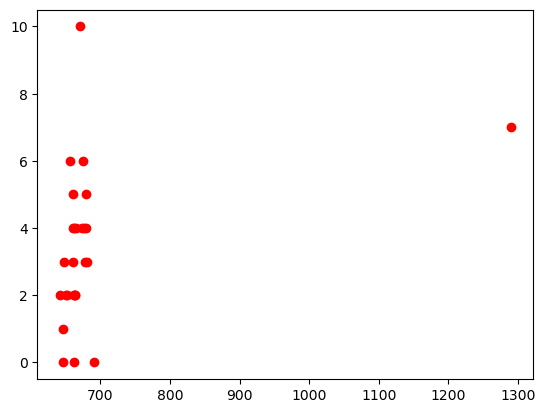

In [4]:
#We can double check how our data looks
plt.plot(df_cleaned['time'],df_cleaned['Clubs Signed Up'], 'ro')

In [5]:
#Seeing as we have an outlier that falls after the club fair, we can cut off all responders after 11:40 AM
df_filtered = df_cleaned[df_cleaned['time']<time_to_minutes('11:40')]

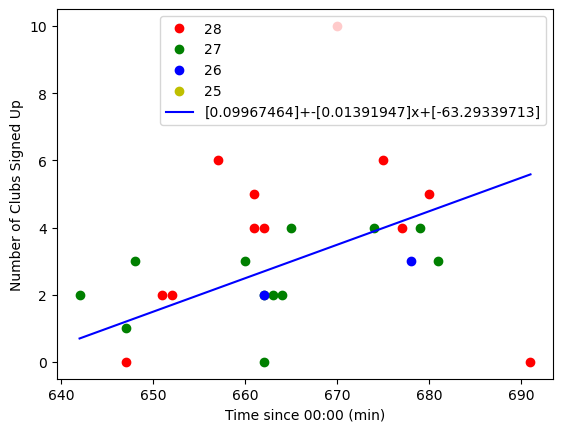

In [6]:
#As we are using the leastsq function, we need to create a function that calculates the residual, or the difference between our prediction and the expected value
def func(p,x,y):
    #p is an array of all our parameters
    a = p
    #a*x+b = 0 @ x = time_to_minutes('10:35'), therefore 
    b = -time_to_minutes('10:35')*a
    #We return the difference
    return (a*x+b-y)

#The next two lines call on the scipy library to do regression based on our residual function. Change x0 based on the number of parameters, and args based on what you want to look at
fit = op.leastsq(func, x0=(1), args=(df_filtered['time'],df_filtered['Clubs Signed Up']), full_output=1)
#The error shows us the standard error of our parameters
error = np.sqrt(np.diag(fit[1])*np.var(func(fit[0],df_filtered['time'],df_filtered['Clubs Signed Up']),ddof=2))

#The parameters are outputted as the first row in our fit array. As I've set b as a function of a, I write it here
a = fit[0]
b = -time_to_minutes('10:35')*a

#I've plotted the entries based on club or class, with different colors.
"""
plt.plot(df_filtered[df_filtered['Club']=='TYPT']['time'],df_filtered[df_filtered['Club']=='TYPT']['Clubs Signed Up'], 'ro', label='TYPT')
plt.plot(df_filtered[df_filtered['Club']=='CST']['time'],df_filtered[df_filtered['Club']=='CST']['Clubs Signed Up'], 'go', label='CST')
plt.plot(df_filtered[df_filtered['Club']=='MT']['time'],df_filtered[df_filtered['Club']=='MT']['Clubs Signed Up'], 'bo', label='MT')
plt.plot(df_filtered[df_filtered['Club']=='ME']['time'],df_filtered[df_filtered['Club']=='ME']['Clubs Signed Up'], 'yo', label='ME')
"""
plt.plot(df_filtered[df_filtered['Class']==28]['time'],df_filtered[df_filtered['Class']==28]['Clubs Signed Up'], 'ro', label='28')
plt.plot(df_filtered[df_filtered['Class']==27]['time'],df_filtered[df_filtered['Class']==27]['Clubs Signed Up'], 'go', label='27')
plt.plot(df_filtered[df_filtered['Class']==26]['time'],df_filtered[df_filtered['Class']==26]['Clubs Signed Up'], 'bo', label='26')
plt.plot(df_filtered[df_filtered['Class']==25]['time'],df_filtered[df_filtered['Class']==25]['Clubs Signed Up'], 'yo', label='25')


x = np.linspace(min(df_filtered['time']),max(df_filtered['time']))
plt.plot(x, a*x+b,'b-', label=str(a)+'+-'+str(error)+'x+'+str(b))

plt.xlabel('Time since 00:00 (min)')
plt.ylabel('Number of Clubs Signed Up')
plt.legend()

In the end, the data does not fit a linear relationship very well. Have a go at writing your own residual functions. Consider using a piecewise function, a polynomial function, or something else. For the piecewise function, you can write your if statements into the residual function, or you can split the data and run seperate functions.

Quick Python Notations:
- Exponents a^b => a**b
- Multiplication ab => a*b
- Division a/b => a/b
- Addition a+b => a+b
- Subtraction a-b => a-b
- Square Root a^(1/2) => np.sqrt(a) or a**(1/2)
- Absolute Value |a| => np.abs(a)
- \# will turn your text into a comment

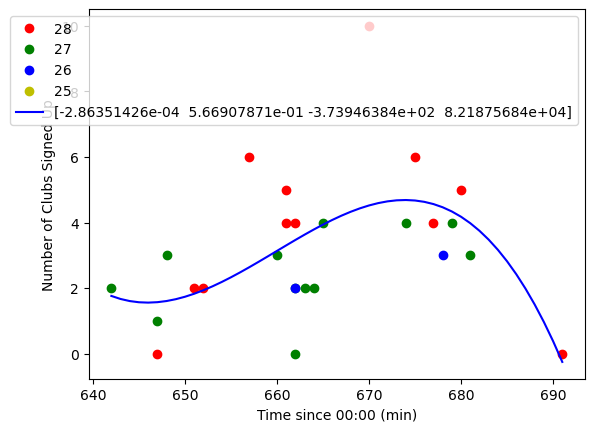

In [7]:
def func(p,x,y):
    a, b, c, d = p #Replace this with however many parameters your equation has
    return (a*x**3+b*x**2+c*x+d) - y #Your return statement should be in the form f(x) - y

#Make sure x0 has the same number of parameters as p. These are your initial guesses
fit = op.leastsq(func, x0=(1,1,1,1), args=(df_filtered['time'],df_filtered['Clubs Signed Up']), full_output=1)
#The error shows us the standard error of our parameters. You should be able to leave this alone, comment it out if it is bothering you
error = np.sqrt(np.diag(fit[1])*np.var(func(fit[0],df_filtered['time'],df_filtered['Clubs Signed Up']),ddof=2))

a, b, c, d = fit[0] #Make sure you have expanded your results into the same length as the parameters

#I've plotted the entries based on club or class, with different colors. You can keep or delete this
"""
plt.plot(df_filtered[df_filtered['Club']=='TYPT']['time'],df_filtered[df_filtered['Club']=='TYPT']['Clubs Signed Up'], 'ro', label='TYPT')
plt.plot(df_filtered[df_filtered['Club']=='CST']['time'],df_filtered[df_filtered['Club']=='CST']['Clubs Signed Up'], 'go', label='CST')
plt.plot(df_filtered[df_filtered['Club']=='MT']['time'],df_filtered[df_filtered['Club']=='MT']['Clubs Signed Up'], 'bo', label='MT')
plt.plot(df_filtered[df_filtered['Club']=='ME']['time'],df_filtered[df_filtered['Club']=='ME']['Clubs Signed Up'], 'yo', label='ME')
"""
plt.plot(df_filtered[df_filtered['Class']==28]['time'],df_filtered[df_filtered['Class']==28]['Clubs Signed Up'], 'ro', label='28')
plt.plot(df_filtered[df_filtered['Class']==27]['time'],df_filtered[df_filtered['Class']==27]['Clubs Signed Up'], 'go', label='27')
plt.plot(df_filtered[df_filtered['Class']==26]['time'],df_filtered[df_filtered['Class']==26]['Clubs Signed Up'], 'bo', label='26')
plt.plot(df_filtered[df_filtered['Class']==25]['time'],df_filtered[df_filtered['Class']==25]['Clubs Signed Up'], 'yo', label='25')

#matplotlib plots things as two vectors. You should be able to leave the x along, and sub your function into the plot, but call me over if you are splitting up your data.
x = np.linspace(min(df_filtered['time']),max(df_filtered['time']))
plt.plot(x, a*x**3+b*x**2+c*x+d,'b-', label=str(fit[0]))

#Leave the bottom part alone
plt.xlabel('Time since 00:00 (min)')
plt.ylabel('Number of Clubs Signed Up')
plt.legend()

In [8]:
# Use this for ranking the models
X = df_filtered['time']
Y = df_filtered['Clubs Signed Up']
def func(x):
    a, b, c, d = fit[0]
    y = (a*x**3+b*x**2+c*x+d)
    return y

n = len(X) 
k = len(fit[0]) #Must be less than 25
rss = np.sum((Y - func(X)) ** 2)
tss = np.sum((Y - np.mean(Y)) ** 2)

r_squared = 1 - (rss / tss)

adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)

print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adjusted_r_squared}")


R-squared: 0.3347125691606595
Adjusted R-squared: 0.20799115376268995
